In [1]:
import pandas as pd
import numpy as np
from scipy.stats import jarque_bera
import matplotlib.pyplot as plt

In [2]:
# Sample data when using PC
# data = pd.read_excel(r'C:/Users/Juan Carlos/Dropbox/Clases/EAFIT/Inversiones/Archivos Excel/Datos Precios Acciones.xlsx', sheet_name = 'IMI Historical Data (1)') # path to file + file name

# Sample data when using Mac
data = pd.read_excel('/Users/juanbotero/Dropbox/Clases/EAFIT/Inversiones/Archivos Excel/Datos Precios Acciones.xlsx', sheet_name = 'IMI Historical Data (1)') # path to file + file name

data.set_index('Date', inplace=True)


print(data.head(5))  # print first 5 rows of the dataframe

             Éxito  Bancolombia  Ecopetrol     GEB     ISA
Date                                                      
2010-04-04  0.0092       0.0368     0.0093  0.0040  0.0094
2010-04-11 -0.0011       0.0095    -0.0128 -0.0054  0.0015
2010-04-18  0.0194      -0.0009     0.0335  0.0375  0.0139
2010-04-25 -0.0101      -0.0120    -0.0054 -0.0039 -0.0107
2010-05-02 -0.0249       0.0113    -0.0344 -0.0395 -0.0370


In [3]:
# create price series
# Create a DataFrame with prices starting at 100 for each stock
prices = (1 + data).cumprod() * 100
print(prices)

                 Éxito  Bancolombia   Ecopetrol         GEB         ISA
Date                                                                   
2010-04-04  100.920000   103.680000  100.930000  100.400000  100.940000
2010-04-11  100.808988   104.664960   99.638096   99.857840  101.091410
2010-04-18  102.764682   104.570762  102.975972  103.602509  102.496581
2010-04-25  101.726759   103.315912  102.419902  103.198459  101.399867
2010-05-02   99.193763   104.483382   98.896657   99.122120   97.648072
...                ...          ...         ...         ...         ...
2022-11-27   66.012746   180.125894   85.084951  150.801824  146.949096
2022-12-04   59.827352   180.035832   81.307180  146.775415  147.727926
2022-12-11   61.759776   189.127641   79.014317  140.317297  150.076800
2022-12-18   63.291418   185.080309   85.201138  137.089999  164.063958
2022-12-25   60.158493   191.391548   89.648638  135.719099  164.145990

[665 rows x 5 columns]


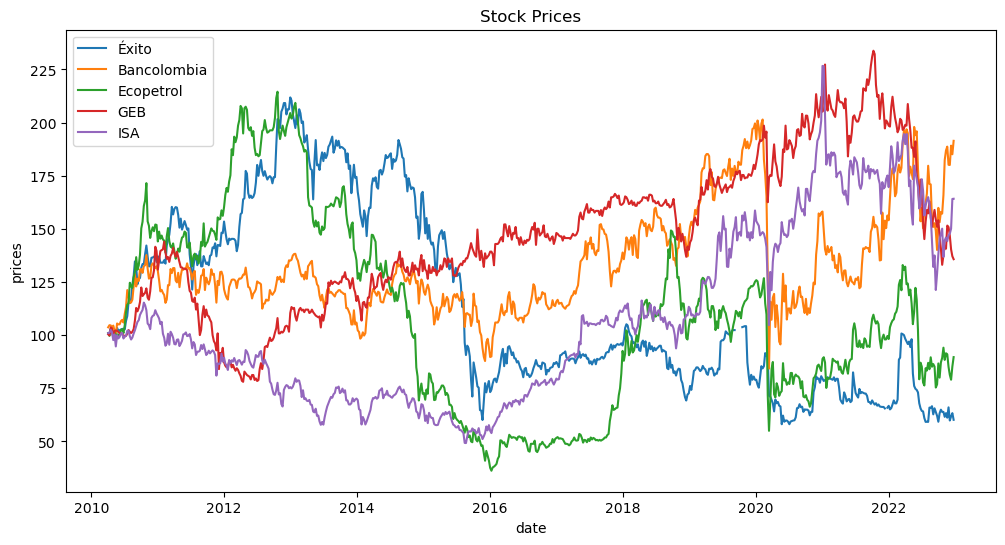

In [8]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# plotting the points 
plt.plot(prices)

# naming the x axis
plt.xlabel('date')
# naming the y axis
plt.ylabel('prices')
  
# giving a title to my graph
plt.title('Stock Prices')

# Adding legends based on column names in the DataFrame
plt.legend(prices.columns)

# function to show the plot
plt.show()

In [29]:
# Calculate statistics using Pandas functions
mean = data.mean(numeric_only=True)
std_dev = data.std(numeric_only=True)
skewness = data.skew(numeric_only=True)
kurtosis = data.kurtosis(numeric_only=True)

correlation_matrix = data.corr()
Var_Covar_matrix = data.cov()


# Output the results
print('\033[1m' + "\n***************** Mean *******************" + '\033[0m')
print(mean)
print('\033[1m' + "\n********** Standard Deviation ************" + '\033[0m')
print(std_dev)
print('\033[1m' + "\n*************** Skewness *****************" + '\033[0m')
print(skewness)
print('\033[1m' + "\n*************** Kurtosis *****************" + '\033[0m')
print(kurtosis)

print('\033[1m' + "\n********************* Correlation Matrix ***********************" + '\033[0m')
print(correlation_matrix)

print('\033[1m' + "\n***************** Variance-Covariance Matrix *******************" + '\033[0m')
print(Var_Covar_matrix)



***************** Mean *******************
Éxito          0.000040
Bancolombia    0.001908
Ecopetrol      0.001022
GEB            0.000869
ISA            0.001393
dtype: float64

********** Standard Deviation ************
Éxito          0.040458
Bancolombia    0.042982
Ecopetrol      0.048119
GEB            0.028510
ISA            0.036128
dtype: float64

*************** Skewness *****************
Éxito          0.564788
Bancolombia    0.215841
Ecopetrol     -0.419005
GEB           -0.375511
ISA            0.405342
dtype: float64

*************** Kurtosis *****************
Éxito           7.765173
Bancolombia    16.284861
Ecopetrol       7.618065
GEB             4.162028
ISA             5.069689
dtype: float64

********************* Correlation Matrix ***********************
                Éxito  Bancolombia  Ecopetrol       GEB       ISA
Éxito        1.000000     0.181297   0.246432  0.078301  0.196107
Bancolombia  0.181297     1.000000   0.455940  0.165892  0.491267
Ecopetrol    0.

In [10]:
def print_green_check():
    # Green color ANSI escape code
    green_color = '\033[32m'
    # Reset ANSI escape code
    reset_color = '\033[0m'
    # Unicode character for checkmark
    check_symbol = '\u2714'

    # Print the green checkmark
    print(green_color + check_symbol + reset_color)

def print_red_x():
    # Red color ANSI escape code
    red_color = '\033[31m'
    # Reset ANSI escape code
    reset_color = '\033[0m'
    # Unicode character for 'X'
    x_symbol = '\u2718'

    # Print the red 'X'
    print(red_color + x_symbol + reset_color)

In [11]:
import math

# Perform the Jarque-Bera test on each column using apply
jb_results = data.apply(jarque_bera)

# Name the rows
jb_results.index = ['Jarque Bera', 'P - value']

# Output the results
print(jb_results)

# Extract p-values from jb_results
p_values = jb_results.apply(lambda x: x[1])

print()

significance_level = 0.05

for column_name in data.columns:
    if math.isnan(p_values[column_name]):
        print(f"It is not possible to calculate the P-value for {column_name}", end=' ')
        print_red_x()
    elif p_values[column_name] < significance_level:
        print(f"P-value for {column_name}: {p_values[column_name]}. The data does not follow a normal distribution.", end=' ')
        print_red_x()
    else:
        print(f"P-value for {column_name}: {p_values[column_name]}. The data follows a normal distribution.", end=' ')
        print_green_check()


             Éxito  Bancolombia    Ecopetrol            GEB            ISA
Jarque Bera    NaN  7235.379509  1599.609199   4.862994e+02   7.171243e+02
P - value      NaN     0.000000     0.000000  2.520091e-106  1.898569e-156

It is not possible to calculate the P-value for Éxito ✘
P-value for Bancolombia: 0.0. The data does not follow a normal distribution. ✘
P-value for Ecopetrol: 0.0. The data does not follow a normal distribution. ✘
P-value for GEB: 2.5200910426938725e-106. The data does not follow a normal distribution. ✘
P-value for ISA: 1.898569209498847e-156. The data does not follow a normal distribution. ✘


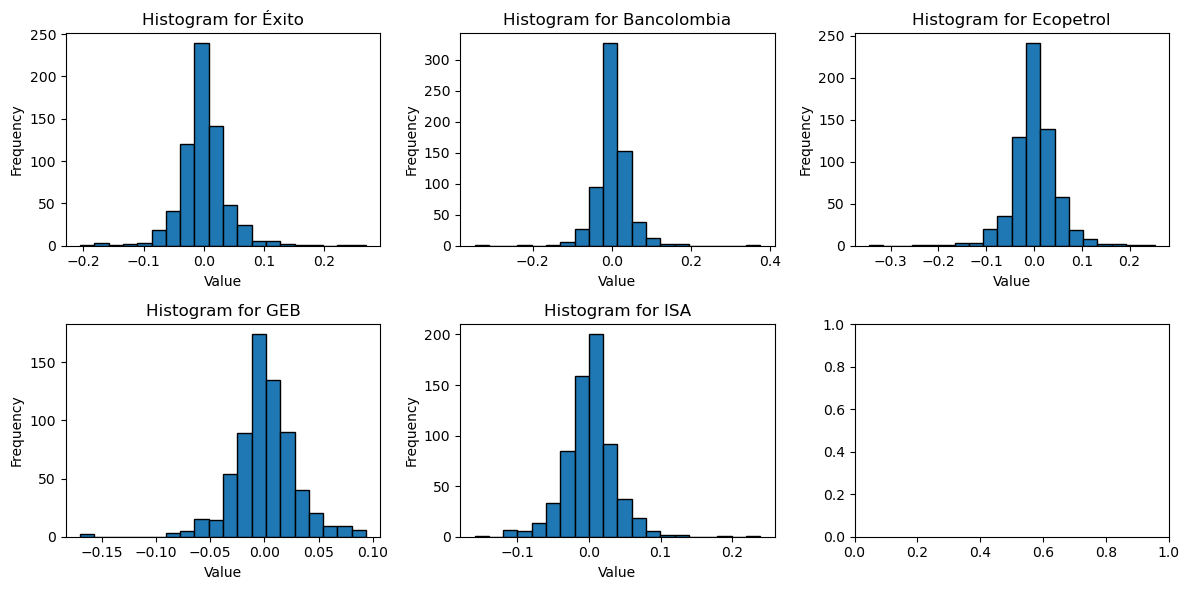

In [21]:
# Plotting the histogram

num_columns = data.shape[1]

# Determine the number of rows and columns for the subplots
nrows = math.ceil(num_columns / 3)
ncols = 3

# Create subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, column_name in enumerate(data.columns):
    axs[i].hist(data[column_name], bins=20, edgecolor='black')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram for {column_name}')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plot
plt.show()